In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import os
os.environ['CUDA_VISIBLE_DEVICES'] = str(1)

from netgraph.adj.netgraph import NetGraphAdj
from netgraph.nx.netgraph import NetGraph
from netgraph.adj.nets import LeNet

import numpy as np
import pandas as pd
# import holoviews as hv
import networkx as nx
from holoviews import opts
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

from keras import backend as K


/nfs/home/anerinovsky/miniconda3/envs/c3d/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)
Using TensorFlow backend.


# [Working] Reimplemet NetGraph to allow dynamic edge addition
**Description:** Reimplement NetGraph to allow dynamic edge addition.
- [X] Build LeNet
- [ ] Draw 3d maps of layers

**Results:** lenet build successfully, but the visualization software crashes.

**How to maybe fix the crash:**
    https://devtalk.nvidia.com/default/topic/1027577/linux/nvidia-387-34-glxinfo-error-of-failed-request-badvalue-integer-parameter-out-of-range-for-operation-/

In [10]:
from netgraph.nx.netgraph import NetGraph

from keras.datasets import cifar10
from keras import backend as K


In [7]:
(x_train, x_train_raw, y_train), (x_test, x_test_raw, y_test) = LeNet.data()
net = LeNet.net()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Successfully loaded lenet


In [8]:
x, x_raw, y = x_test[:1], x_test_raw[:1], y_test[0, 0]

In [8]:
ng = NetGraph()
LeNet.netgraph(ng, x)

Converting tf_ops to tensors



Converting tf_vars to weights


In [9]:
ng.tensors

{'conv2d_1_input': <netgraph.nx.netgraph.Tensor at 0x7fe24aafc710>,
 'conv2d_1/BiasAdd': <netgraph.nx.netgraph.Tensor at 0x7fe259901690>,
 'conv2d_1/Relu': <netgraph.nx.netgraph.Tensor at 0x7fe259800390>,
 'max_pooling2d_1/MaxPool': <netgraph.nx.netgraph.Tensor at 0x7fe259901390>,
 'conv2d_2/BiasAdd': <netgraph.nx.netgraph.Tensor at 0x7fe24aae2fd0>,
 'conv2d_2/Relu': <netgraph.nx.netgraph.Tensor at 0x7fe24aae2ed0>,
 'max_pooling2d_2/MaxPool': <netgraph.nx.netgraph.Tensor at 0x7fe2e978d050>,
 'flatten_1/Reshape': <netgraph.nx.netgraph.Tensor at 0x7fe259901c90>,
 'dense_1/BiasAdd': <netgraph.nx.netgraph.Tensor at 0x7fe2e978d1d0>,
 'dense_1/Relu': <netgraph.nx.netgraph.Tensor at 0x7fe2e978d250>,
 'dense_2/BiasAdd': <netgraph.nx.netgraph.Tensor at 0x7fe24aafc750>,
 'dense_2/Relu': <netgraph.nx.netgraph.Tensor at 0x7fe24aafc0d0>,
 'dense_3/BiasAdd': <netgraph.nx.netgraph.Tensor at 0x7fe24aafc510>,
 'dense_3/Softmax': <netgraph.nx.netgraph.Tensor at 0x7fe24aafc8d0>,
 'conv2d_1_input_padded':

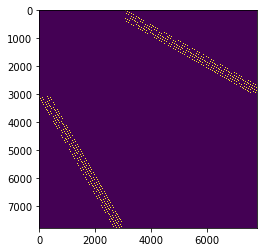

In [29]:
mx = nx.adjacency_matrix(ng.graph, ng.tensor('conv2d_1_input_padded').node_list() + ng.tensor('conv2d_1/BiasAdd').node_list())
# mx = nx.adjacency_matrix(ng.graph, ng.tensor('conv2d_1/BiasAdd').node_list() + ng.tensor('conv2d_1/Relu').node_list())
# mx = nx.adjacency_matrix(ng.graph, ng.tensor('conv2d_1/Relu').node_list() + ng.tensor('max_pooling2d_1/MaxPool').node_list())

plt.imshow(mx.todense())

In [ ]:
from mayavi import mlab
mlab.init_notebook()

H=nx.cycle_graph(20)

# reorder nodes from 0,len(G)-1
G=nx.convert_node_labels_to_integers(H)
# 3d spring layout
pos=nx.spring_layout(G,dim=3)
# numpy array of x,y,z positions in sorted node order
xyz=np.array([pos[v] for v in sorted(G)])
# scalar colors
scalars=np.array(G.nodes())+5

mlab.figure(1, bgcolor=(0, 0, 0))
# mlab.clf()

# pts = mlab.points3d(xyz[:,0], xyz[:,1], xyz[:,2],
#                     scalars,
#                     scale_factor=0.1,
#                     scale_mode='none',
#                     colormap='Blues',
#                     resolution=20)

# pts.mlab_source.dataset.lines = np.array(G.edges())
# tube = mlab.pipeline.tube(pts, tube_radius=0.01)
# mlab.pipeline.surface(tube, color=(0.8, 0.8, 0.8))

# mlab.show()

# 


In [8]:
from netgraph.nx.keras_frontend import lenet
from keras import backend as K

input_name = 'conv2d_1_input'
(x_train, x_train_raw, y_train), (x_test, x_test_raw, y_test) = LeNet.data()
net = LeNet.net()
x, x_raw, y = x_test[:1], x_test_raw[:1], y_test[0, 0]

sess = K.get_session()

ng = NetGraph(sess=sess, feed_dict={ sess.graph.get_tensor_by_name(input_name + ':0') : x })
ng = lenet(ng, input_name)

Successfully loaded lenet


# [Working] Longest path sensitivity map

**Description:** Build a sensitivity map by calculating the longest disstances from an image pixel to the target class

- [ ] Create a sensitivity map for LeNet on cifar10 images
 - [X] Just activations
 - [ ] Activations + weights
- [X] Create a sensitivity map for LeNet on MNIST images

**Expected results:** A sensitivity map.

**Results:**



## LeNet on cifar10

In [30]:
(x_train, x_train_raw, y_train), (x_test, x_test_raw, y_test) = LeNet.data()
net = LeNet.net()

Successfully loaded lenet


In [30]:
x, x_raw, y = x_test[:1], x_test_raw[:1], y_test[0, 0]


from netgraph.nx.keras_frontend import lenet





def get_sensitivity(x, x_raw, y):

    ng = NetGraph()
    ng = lenet(ng, x)

    g = ng.graph
    
    for e1, e2 in tqdm(g.edges):
        g[e1][e2]['weight'] = -(g.node[e1]['activation'] + g.node[e2]['activation'])/2 + 100 # + m_weight + 2
    
    input, output = map(ng.tensor, ('conv2d_1_input', 'dense_3/Softmax'))

    sensitivity = np.zeros_like(input.data)

    for batch, w_ix, h_ix, ch in tqdm(list(np.ndindex(*sensitivity.shape))):
        try:
            plen = nx.shortest_path_length(g, input.nodes[batch, w_ix, h_ix, ch], output.nodes[0, y], 'weight')
        except nx.NetworkXNoPath:
            plen = 0
        sensitivity[batch, w_ix, h_ix, ch] = plen

    s = sensitivity.copy()

    s[s==0] = s[s!=0].min() - 0.01

    plt.imshow(x_raw[0])
    plt.imshow(s[0,:,:,1]/s.max(), cmap='fire', alpha=0.4)
    plt.show()
    return sensitivity, x, x_raw, y

Converting tf_ops to tensors



Converting tf_vars to weights


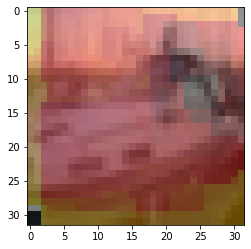

Converting tf_ops to tensors



Converting tf_vars to weights


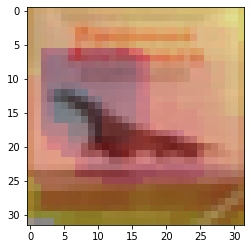

Converting tf_ops to tensors



Converting tf_vars to weights


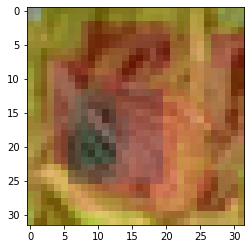

Converting tf_ops to tensors



Converting tf_vars to weights


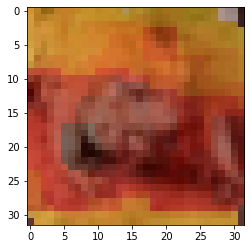

In [31]:
ss = [get_sensitivity(x_test[i][None], x_test_raw[i][None], y_test[i, 0]) for i in [2,3, 4, 5]]

[autoreload of netgraph.nx.keras_frontend failed: Traceback (most recent call last):
  File "/nfs/home/anerinovsky/miniconda3/envs/c3d/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/nfs/home/anerinovsky/miniconda3/envs/c3d/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 378, in superreload
    module = reload(module)
  File "/nfs/home/anerinovsky/miniconda3/envs/c3d/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/nfs/home/anerinovsky/miniconda3/envs/c3d/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/nfs/home/anerinovsky/ng/netgraph/nx/keras_frontend.py", line 58, in <module>
  

Converting tf_ops to tensors



Converting tf_vars to weights


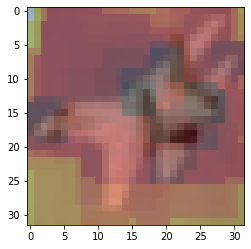

Converting tf_ops to tensors



Converting tf_vars to weights


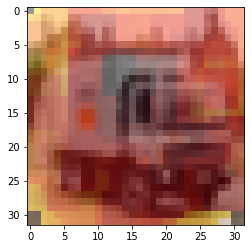

Converting tf_ops to tensors



Converting tf_vars to weights


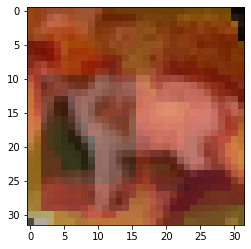

Converting tf_ops to tensors



Converting tf_vars to weights


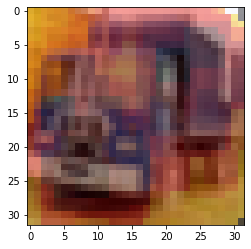

Converting tf_ops to tensors



Converting tf_vars to weights


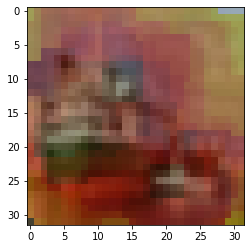

Converting tf_ops to tensors



Converting tf_vars to weights


KeyboardInterrupt: 

In [32]:
ss2 = [get_sensitivity(x_test[i][None], x_test_raw[i][None], y_test[i, 0]) for i in [10, 11, 12, 14, 51, 15, 53,112]]

Converting tf_ops to tensors



Converting tf_vars to weights


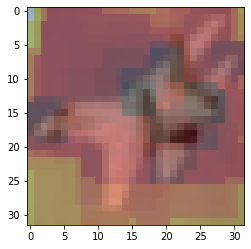

Converting tf_ops to tensors



Converting tf_vars to weights


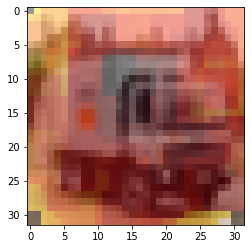

Converting tf_ops to tensors



Converting tf_vars to weights


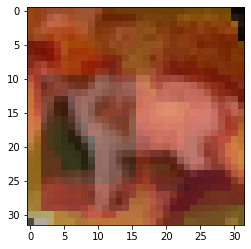

Converting tf_ops to tensors



Converting tf_vars to weights


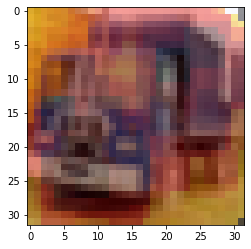

Converting tf_ops to tensors



Converting tf_vars to weights


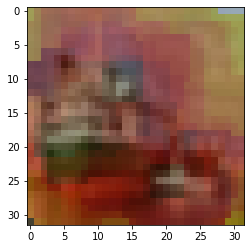

Converting tf_ops to tensors



Converting tf_vars to weights


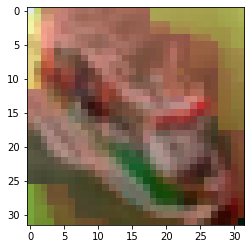

Converting tf_ops to tensors



Converting tf_vars to weights


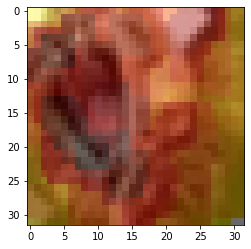

Converting tf_ops to tensors



Converting tf_vars to weights


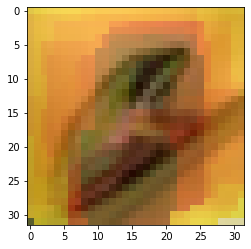

In [48]:
ss2 = [get_sensitivity(x_test[i][None], x_test_raw[i][None], y_test[i, 0]) for i in [10, 11, 12, 14, 51, 15, 53,112]]

Converting tf_ops to tensors



Converting tf_vars to weights


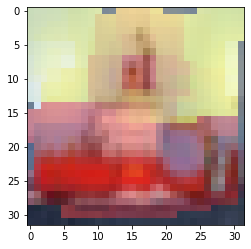

Converting tf_ops to tensors



Converting tf_vars to weights


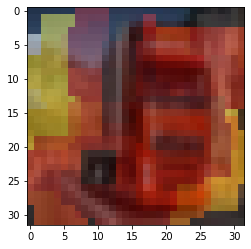

Converting tf_ops to tensors



Converting tf_vars to weights


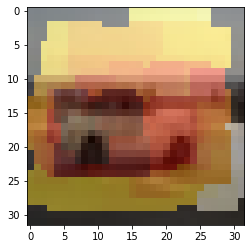

Converting tf_ops to tensors



Converting tf_vars to weights


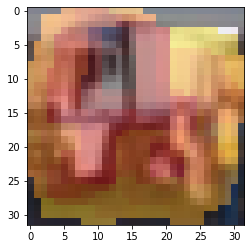

Converting tf_ops to tensors



Converting tf_vars to weights


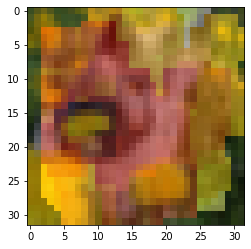

Converting tf_ops to tensors



Converting tf_vars to weights


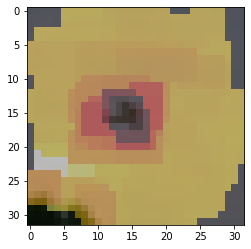

Converting tf_ops to tensors



Converting tf_vars to weights


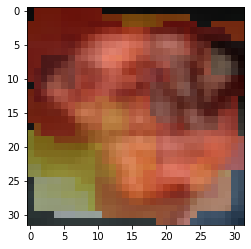

Converting tf_ops to tensors



Converting tf_vars to weights


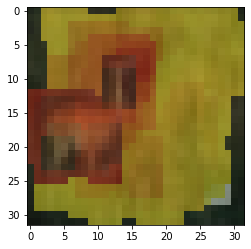

Converting tf_ops to tensors



Converting tf_vars to weights


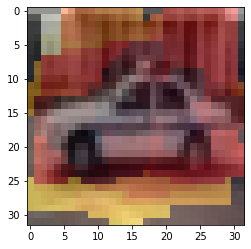

Converting tf_ops to tensors



Converting tf_vars to weights


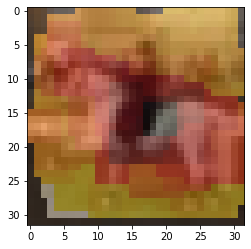

Converting tf_ops to tensors



Converting tf_vars to weights


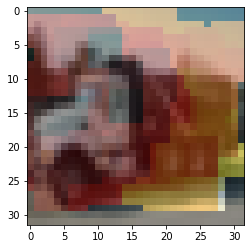

Converting tf_ops to tensors



Converting tf_vars to weights


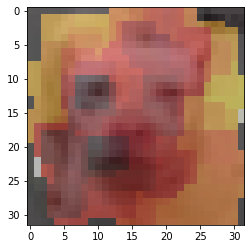

Converting tf_ops to tensors



Converting tf_vars to weights


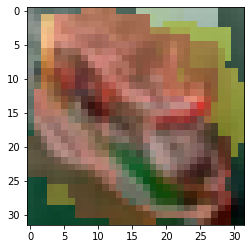

Converting tf_ops to tensors



Converting tf_vars to weights


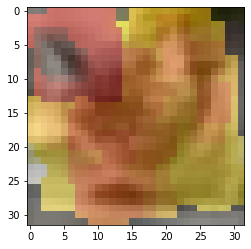

Converting tf_ops to tensors



Converting tf_vars to weights


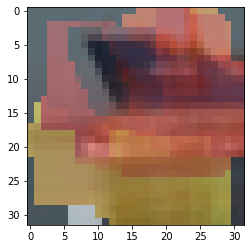

Converting tf_ops to tensors



Converting tf_vars to weights


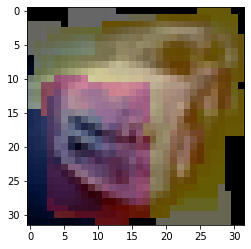

Converting tf_ops to tensors



Converting tf_vars to weights


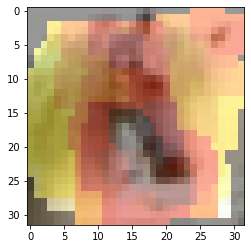

Converting tf_ops to tensors



Converting tf_vars to weights


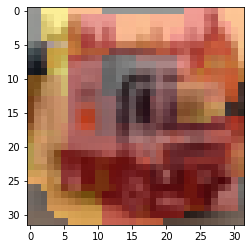

Converting tf_ops to tensors



Converting tf_vars to weights


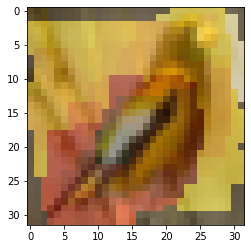

Converting tf_ops to tensors



Converting tf_vars to weights


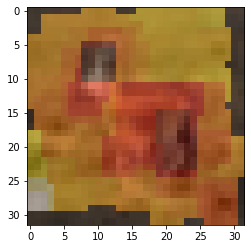

In [173]:
ss2 = [get_sensitivity(x_test[i][None], x_test_raw[i][None], y_test[i, 0]) for i in np.random.choice(500, size=20, replace=False)]

In [132]:
from collections import defaultdict


sensitivity = defaultdict(lambda: np.zeros_like(input.data))

In [135]:
for cls in tqdm(range(10)):
    for batch, w_ix, h_ix, ch in tqdm(list(np.ndindex(*sensitivity[0].shape))):
        try:
            plen = nx.shortest_path_length(g, output.nodes[0, cls], input.nodes[batch, w_ix, h_ix, ch], 'weight')
        except nx.NetworkXNoPath:
            plen = 0
        sensitivity[cls][batch, w_ix, h_ix, ch] = plen

(array([256., 271., 392., 349., 274., 333., 286., 127., 320., 116.]),
 array([0.95000637, 0.9550057 , 0.9600051 , 0.96500444, 0.97000384,
        0.9750032 , 0.9800025 , 0.9850019 , 0.99000126, 0.99500066,
        1.        ], dtype=float32),
 <a list of 10 Patch objects>)

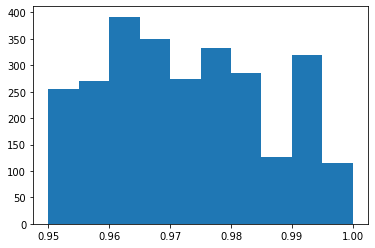

In [138]:
i = 0
plt.hist(sensitivity[i][sensitivity[i] > 500].ravel()/sensitivity[i].max())

(array([256., 271., 392., 349., 274., 333., 286., 127., 320., 116.]),
 array([0.9498665 , 0.9548798 , 0.95989317, 0.9649065 , 0.96991986,
        0.97493327, 0.9799466 , 0.98495996, 0.9899733 , 0.99498665,
        1.        ], dtype=float32),
 <a list of 10 Patch objects>)

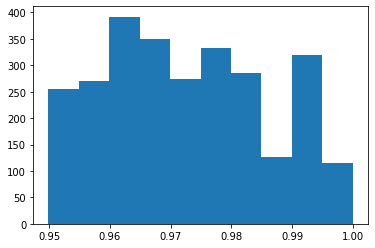

In [141]:
i = 9
plt.hist(sensitivity[i][sensitivity[i] > 500].ravel()/sensitivity[i].max())

(array([ 348.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2724.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32), <a list of 10 Patch objects>)

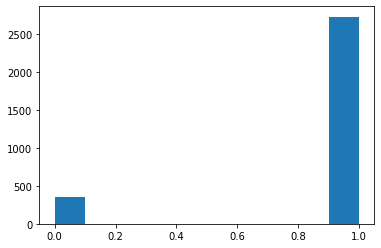

In [123]:
plt.hist(sensitivity.ravel()/sensitivity.max())

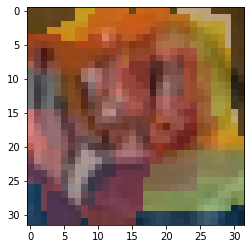

In [154]:
s = sensitivity[4].copy()

s[s==0] = s[s!=0].min() - 0.01



plt.imshow(x_test_raw[0])
plt.imshow(s[0,:,:,1]/s.max(), cmap='fire', alpha=0.4)


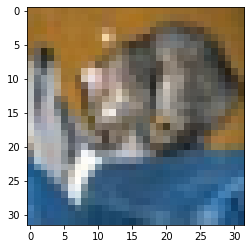

In [118]:
plt.imshow(x_test_raw[0])

(array([1034.,  803.,  440.,  249.,  264.,   52.,  152.,   18.,   33.,
          27.]),
 array([0.        , 0.00230873, 0.00461745, 0.00692618, 0.00923491,
        0.01154363, 0.01385236, 0.01616108, 0.01846981, 0.02077854,
        0.02308726], dtype=float32),
 <a list of 10 Patch objects>)

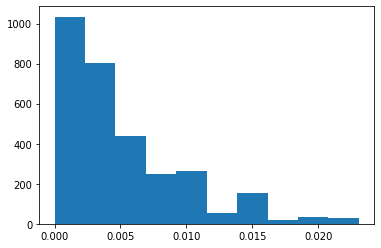

In [102]:
plt.hist(s.ravel()/s.min() - 1)

## LeNet on Mnist

In [2]:
from keras.models import load_model
from netgraph.nx.nets.lenet import data

model = load_model('lenet-mnist.hdf5')
(x_train, x_train_raw, y_train), (x_test, x_test_raw, y_test) = data('mnist')

x, x_raw, y = x_test[:1], x_test_raw[:1], y_test[0]


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [7]:
from lucid.misc.io.showing import graph

sess = K.get_session()
graph(sess.graph)

In [20]:
from netgraph.nx.nets.lenet import lenet

x, x_raw, y = x_test[:1], x_test_raw[:1], y_test[0]
x = x_raw


input_name = 'conv2d_1_input'
ng = NetGraph(
    sess = K.get_session(), 
    feed_dict = { 
        K.get_session().graph.get_tensor_by_name(input_name + ':0') : x 
    })
ng = lenet(ng, x)

g = ng.graph

for e1, e2 in tqdm(g.edges):
    g[e1][e2]['weight'] = -(g.node[e1]['activation'] + g.node[e2]['activation'])/2 + 100 # + m_weight + 2

input, output = map(ng.tensor, ('conv2d_1_input', 'dense_3/Softmax'))

sensitivity = np.zeros_like(input.data)

for batch, w_ix, h_ix, ch in tqdm(list(np.ndindex(*sensitivity.shape))):
    try:
        plen = nx.shortest_path_length(g, input.nodes[batch, w_ix, h_ix, ch], output.nodes[0, y], 'weight')
    except nx.NetworkXNoPath:
        plen = 0
    sensitivity[batch, w_ix, h_ix, ch] = plen

s = sensitivity.copy()

s[s==0] = s[s!=0].min() - 0.01

Processing Input as conv2d_1_input
Extracting tesor conv2d_1_input
Registering tensor conv2d_1_input
Processing Conv2D as conv2d_1
Extracting tesor conv2d_1/BiasAdd
Registering tensor conv2d_1/BiasAdd



Extracting tesor conv2d_1/Relu
Registering tensor conv2d_1/Relu
Processing MaxPooling2D as max_pooling2d_1
Extracting tesor max_pooling2d_1/MaxPool
Registering tensor max_pooling2d_1/MaxPool
Processing Conv2D as conv2d_2
Extracting tesor conv2d_2/BiasAdd
Registering tensor conv2d_2/BiasAdd



Extracting tesor conv2d_2/Relu
Registering tensor conv2d_2/Relu
Processing MaxPooling2D as max_pooling2d_2
Extracting tesor max_pooling2d_2/MaxPool
Registering tensor max_pooling2d_2/MaxPool
Processing Flatten as flatten_1
Extracting tesor flatten_1/Reshape
Registering tensor flatten_1/Reshape
Processing Dense as dense_1
Extracting tesor dense_1/BiasAdd
Registering tensor dense_1/BiasAdd
Extracting tesor dense_1/Relu
Registering tensor dense_1/Relu
Processing Dense as dense_2
Extracting tesor dense_2/BiasAdd
Registering tensor dense_2/BiasAdd
Extracting tesor dense_2/Relu
Registering tensor dense_2/Relu
Processing Dense as dense_3
Extracting tesor dense_3/BiasAdd
Registering tensor dense_3/BiasAdd
Extracting tesor dense_3/Softmax
Registering tensor dense_3/Softmax


(1, 28, 28, 1)

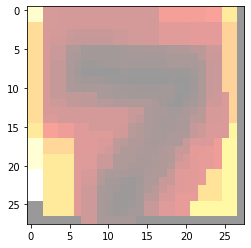

In [16]:
#plt.imshow(x_raw[0])
# plt.imshow(s[0,:,:,1]/s.max(), cmap='fire', alpha=0.4)
# plt.show()

x_raw.shape
  

(1, 28, 28, 1)

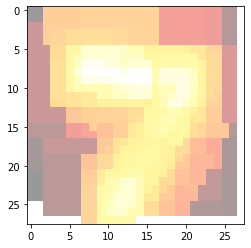

In [22]:
# plt.imshow(x_raw[0,:, :, 0])
plt.imshow(s[0,:,:,0]/s.max(), cmap='fire', alpha=0.4)
# plt.show()

x_raw.shape
  

(1, 28, 28, 1)

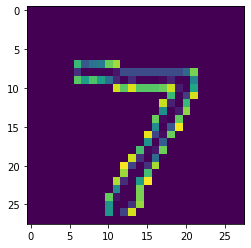

In [19]:
plt.imshow(-x_raw[0,:, :, 0])
# plt.imshow(s[0,:,:,0]/s.max(), cmap='fire', alpha=0.4)
# plt.show()

x_raw.shape
  

In [23]:
xs = [{1:10} ,{2:20}]

for x in xs:
    x[100] = 0
    
xs

[{1: 10, 100: 0}, {2: 20, 100: 0}]

# Create a graph of ResNet

In [2]:
from keras.applications.resnet import ResNet50

net = ResNet50()

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
from lucid.misc.io.showing import graph
from keras import backend as K
sess = K.get_session()
graph(sess.graph)

In [ ]:
from netgraph.nx.nets.resnet import ResNet50

from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions


from pathlib import Path


input_name = 'input_1'

imagenet_dir = Path('/media/disk1/anerinovsky/datasets/fvs/imagenette-320/')


img = image.load_img(imagenet_dir/'val'/'n01440764'/'ILSVRC2012_val_00000293.JPEG', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

sess = K.get_session()

ng = NetGraph(sess=sess, feed_dict={ sess.graph.get_tensor_by_name(input_name + ':0') : x })
ResNet50(ng)


Processing Input as input_1
Extracting tesor input_1
Registering tensor input_1
Processing ZeroPadding2D as conv1_pad
Extracting tesor conv1_pad/Pad
Registering tensor conv1_pad/Pad
Processing Conv2D as conv1_conv
Extracting tesor conv1_conv/BiasAdd
Registering tensor conv1_conv/BiasAdd



Processing BatchNormalization as conv1_bn
Extracting tesor conv1_bn/FusedBatchNorm
Registering tensor conv1_bn/FusedBatchNorm
Processing Activation as conv1_relu
Extracting tesor conv1_relu/Relu
Registering tensor conv1_relu/Relu
Processing ZeroPadding2D as pool1_pad
Extracting tesor pool1_pad/Pad
Registering tensor pool1_pad/Pad
Processing MaxPooling2D as pool1_pool
Extracting tesor pool1_pool/MaxPool
Registering tensor pool1_pool/MaxPool
Processing Conv2D as conv2_block1_0_conv
Extracting tesor conv2_block1_0_conv/BiasAdd
Registering tensor conv2_block1_0_conv/BiasAdd


In [9]:
nx.DiGraph.add_edges_from??

In [8]:
# list.extend
np.array([]).ndim

1

In [3]:
import h5py

In [4]:
h5py.Dataset.resize

<function h5py._hl.group.Group.create_dataset(self, name, shape=None, dtype=None, data=None, **kwds)>